<a href="https://colab.research.google.com/github/DeboraOliver/StockMarket_Analysis/blob/main/Aloca%C3%A7%C3%A3o_e_otimiza%C3%A7%C3%A3o_de_portf%C3%B3lios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - alocação e otimização de portfólios

## Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


## Alocação aleatória de ativos

In [5]:
len(dataset.columns) - 1 # quantas colunas - 1 senão daria 7

6

In [6]:
dataset.loc[len(dataset) - 1]['BOVA']

92.41000366210938

In [7]:
#uma função que faz a alocação dos ativos
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy() #copiamos o dataset

  if seed != 0: #define se queremos numeros aleatórios ou repetir os experimentos
    np.random.seed(seed) #seed é a semente geradora aleatória
    #um seed  = 11 pode ser rodado varias vezes e sempre nos dará os mesmos pesos

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1) #pesos randomicos para cada coluna
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum() #normalizando para que dê 100% no final
    print(pesos, pesos.sum())

  colunas = dataset.columns[1:]  #normalizando
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0]) #sempre dividindo pelo primeiro item

  for i, acao in enumerate(dataset.columns[1:]): #enumerate apenas gera um indice de 0  a 5 aqui no caso
    #multiplicando o dado normalizado pelo peso e o dinheiro
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
    #trará uma tabela de quanto foi investido em cada caso
  
  #calculando o valor total ganhado
  #vai criar uma tabela com o total ganho e na ultima coluna o total investido no começo e ao final o quanto ganhei
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']#copiando apenas as datas
  #print(datas)

  #valor criar uma coluna com a taxa de retorno
  dataset.drop(labels = ['Date'], axis = 1, inplace = True) #apagamos a coluna data
  dataset['taxa retorno'] = 0.0 #todos os valores estão zerados

  #taxas de retorno simples, no 1º dia é 0
  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  #cria uma nova coluna para sabermos o quanto estamos alocando em cada empresa
  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor'] #busca o ultimo valor

In [8]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10)
#se seed igual a zero td vez que roda teremos valores distintos, se colocarmos 10 teremos sempre os mesmos

[0.26617196 0.00716121 0.21866313 0.25840174 0.17202779 0.07757418] 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [9]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334904,1100.763673,1316.288069,833.710425,380.156147,4984.683405,-0.306332
2,1350.392100,34.863773,1084.437134,1298.945650,781.573105,382.290029,4932.501791,-1.046839
3,1291.795217,34.557537,1072.014590,1342.304468,776.046225,395.175284,4911.893321,-0.417810
4,1266.935952,33.332592,1090.113087,1331.899017,794.066437,398.129839,4914.476924,0.052599
...,...,...,...,...,...,...,...,...
1441,1651.367094,33.379707,7682.429339,141236.798956,686.048657,786.246983,152076.270736,-0.066212
1442,1502.211333,30.081783,7304.030139,136686.134989,661.976774,758.588795,146943.023813,-3.375442
1443,1474.688596,29.869773,7386.170428,140737.335967,686.048657,762.528265,151076.641685,2.813075
1444,1393.007983,28.927508,6998.542117,136686.134989,649.940833,744.062131,146500.615560,-3.028944


In [10]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
1441    2020-10-27
1442    2020-10-28
1443    2020-10-29
1444    2020-10-30
1445    2020-11-03
Name: Date, Length: 1446, dtype: object

In [11]:
acoes_pesos

,Ações,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


In [12]:
soma_valor #o valor ao final dos quase 6 anos

150607.25846015807

## Visualização dos dados

In [13]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio')
figura.show()

In [14]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns: #apagamos algumas colunas de totais/calculos
  figura.add_scatter(x = datas, y = dataset[i], name = i) #dataset[i] cada uma das ações e i é o nome
figura.show()

In [15]:
figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.show()

## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [16]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1
#dinheiro final / dinheiro inicial

29.121451692031616

### Desvio padrão

In [17]:
dataset['taxa retorno'].std()

2.816744314761338

### Sharpe ratio

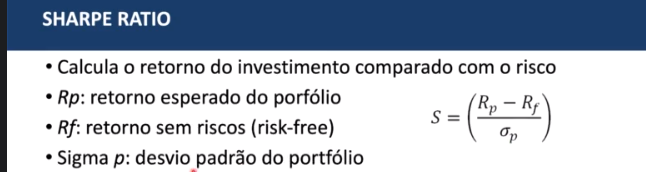

In [18]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)
#calculo do sharpe ratio para um ano
#qunato mais alto melhor (acima de 1 é bom, mas acima de 3 é excelente)
#essa métrica nos ajuda na alocação pq faz o sharpe ratio subir

1.5341112767145664

In [19]:
dinheiro_total = 5000 #total que eu quero investir

In [20]:
soma_valor - dinheiro_total #lucro investindo nesta carteira

145607.25846015807

In [21]:
# Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/
#vms ver se vale a pena investir em renda fixa
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [22]:
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015
#rendimento na renda fixa os mesmo 5 mil reais em 2015

5637.5

In [23]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016
#rendimento na renda fixa os mesmo 5 mil reais em 2016

6440.84375

In [24]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017
#rendimento na renda fixa os mesmo 5 mil reais em 2017

7229.8471093749995

In [25]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018
#rendimento na renda fixa os mesmo 5 mil reais em 2018

7699.787171484374

In [26]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019
#rendimento na renda fixa os mesmo 5 mil reais em 2019

8084.7765300585925

In [27]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020
#rendimento na renda fixa os mesmo 5 mil reais em 2020

8246.472060659764

In [28]:
rendimentos = valor_2020 - dinheiro_total
rendimentos
#rendimento total na renda fixa

3246.472060659764

In [29]:
ir = rendimentos * 15 / 100
ir
#tirando o imposto de renda sobre o investimento em renda fixa

486.9708090989646

In [30]:
valor_2020 - ir
#rendimento liquido

7759.5012515608

In [31]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
taxa_selic_historico.mean() / 100 #media das taxas selic
#calculando o risq free

0.08791666666666666

In [32]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)
#shape ratio

1.0445677178791346

# Observação feita por um prossional da área de finanças sobre a forma de cálculo de Sharpe ratio
"A taxa de Selic é a media de determinadas operações considerando a liquidez diária das mesma. Se todas elas estiverem, no mesmo padrão, no caso, considerando a taxa mensal, anual ou diária. O retorno da carteira calculado anualizado está na mesma forma do cálculo do sharpe ratio que faz sentido. O único dado que está um pouco desconexo é o desvio padrão ser calculado pela base diária e não pelo valor da taxa anual."

No momento não esta programada uma atualização na estrutura do curso.

## Otimização de portfólio - randômico

Alocação randomica à procura de uma combinação de pesos que melhorem os resultados

- Markowitz: https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio

In [39]:
import sys
1 - sys.maxsize

-9223372036854775806

In [40]:
#vamos tentar descobrir qual a melhor combinação de pesos que melhora o sharpe ratio

def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes): 
  #repeticoes é a quantidade de portifólios que vamos gerar
  #sem risco = renda fixa

  #duas cópias do mesmo dataset
  dataset = dataset.copy() #criamos uma nova variável
  dataset_original = dataset.copy() 

#para o gráfico vamos armazenas esses valores:
  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

#inicializa com um valor pequeno, lembrando que quando maior melhor o resultado
  melhor_sharpe_ratio = 1 - sys.maxsize #apenas para termos um valor bem pequeno mesmo
  melhores_pesos = np.empty #numpy vazia
  melhor_volatilidade = 0 #retorno da carteira inicializado com 0 
  melhor_retorno = 0
  
  #podemos passar um conjunto de pesos
  #if len(melhorees pesos)>0:
  #pesos = melhores pesos
  #else:
  #pesos = np.random.random(len(dataset.columns))

  for _ in range(repeticoes): # o _ significa que só irá repetir o numero de vezes que passarmos no "repetições"
    #geramos pesos aleatórios e a soma deles deve ser igual a 1
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    #nomalizamos o valor das ações
    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]
  #o valor do dinheiro investido em cada uma das ações
    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
#apagamos a coluna date
    dataset.drop(labels = ['Date'], axis = 1, inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1)) #retorno logaritmico para todo o dataset
    matriz_covariancia = retorno_carteira.cov() #msm q usamos para calcular o risco de um portfolio

#cria 2 novas colunas: soma todas as linhas e taxa de retorno com 0.0
    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

  #calculamos a taxa de retorno logaritmica, mas deveria ser a simples
    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    #necessário e diferenciais do markovitz
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos))) #baseado no desvio padrão
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada #finalmente o sharpe ratio

    if sharpe_ratio > melhor_sharpe_ratio: #sempre retorna o melhor
      melhor_sharpe_ratio = sharpe_ratio #atualizamos
      melhores_pesos = pesos #os pesos encontrados
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)
    
    #nova cópia do dataset original
    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [41]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean() / 100, 100)

In [42]:
sharpe_ratio, melhores_pesos

(1.5154468565084152,
 array([0.04064094, 0.05429105, 0.35816625, 0.34038687, 0.04047153,
        0.16604335]))

In [43]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [44]:
acoes_pesos, soma_valor

(  Ações      Pesos
 0   GOL   4.064094
 1   CVC   5.429105
 2  WEGE  35.816625
 3  MGLU  34.038687
 4  TOTS   4.047153
 5  BOVA  16.604335, 199138.65484256457)

In [45]:
print(ls_retorno)

[0.4560348124189272, 0.5682784635789174, 0.5552662881095234, 0.423966781207423, 0.33571105277750624, 0.5027869715697361, 0.5540565066835217, 0.49147572280600316, 0.49117309960420924, 0.41941313180884227, 0.4166870614676439, 0.2885821307026486, 0.5790423004576724, 0.3500870312157811, 0.17709747637621467, 0.4424244236318077, 0.619838833042777, 0.5315516521419436, 0.5108849421845802, 0.5811320408348414, 0.5979029055755277, 0.44194320982780066, 0.6539417066437907, 0.5595539243435528, 0.5796294770641782, 0.5268898389193643, 0.5387822913027687, 0.613009491000615, 0.6268344420517542, 0.5725227421419253, 0.5284316557238622, 0.30787710451131617, 0.20594234021998073, 0.4120179207198911, 0.41610078992719496, 0.48571451248293507, 0.4231679561474431, 0.5702087260321792, 0.5155322060441111, 0.5194360029464189, 0.5661386971681728, 0.3771712631995276, 0.5454077665248838, 0.5044793188154336, 0.45907156253006487, 0.37684529238487957, 0.5581389655615917, 0.5248307187919543, 0.5516420828487797, 0.60499475

In [46]:
print(ls_volatilidade)

[0.31011615535321574, 0.3385773457096268, 0.3447145154487648, 0.344641869825529, 0.2806382034674432, 0.3441396474189091, 0.36695340485052397, 0.3581501995474016, 0.32744893185019697, 0.354198092145302, 0.3829765128996305, 0.4040274252128353, 0.3974740955798952, 0.4158483318147268, 0.40007574882350466, 0.427427246569291, 0.4029915205378911, 0.4327737222677917, 0.3828619840089435, 0.342588687290253, 0.4035115005111783, 0.3239790530432719, 0.3814281533070048, 0.3767142921090748, 0.37344817293681654, 0.41019590677219425, 0.38070994788586904, 0.37550068786568946, 0.3556164131197266, 0.4021356687523591, 0.3613812319433737, 0.3199765414501504, 0.4754945332104233, 0.3489673981466937, 0.3608881033547984, 0.36911962181446106, 0.36875701761679464, 0.39782630278998876, 0.3341179511515345, 0.3506984638332383, 0.41366005098234865, 0.35719022966006225, 0.4001027686865516, 0.43921322497463855, 0.35375926307453787, 0.3430731874587064, 0.3702376594456085, 0.39576448645095125, 0.3629734450632024, 0.40852

In [47]:
print(ls_sharpe_ratio)

[1.1870331145211759, 1.4187653220136656, 1.3557584624321377, 0.9750704831971746, 0.8829674044702405, 1.2055289415638366, 1.270297083649446, 1.126787187747818, 1.2315093857811894, 0.9359069754847422, 0.8584609857971645, 0.49666297759434164, 1.235616708742937, 0.6304470752714704, 0.2229098113839701, 0.8293990610345219, 1.3199338925695747, 1.0250968639005409, 1.1047539144237242, 1.4396720979589894, 1.2638703934405784, 1.092745163107347, 1.4839624056841458, 1.2519760135363462, 1.3166828653375262, 1.070154930864498, 1.1842759222337542, 1.3983804592170694, 1.5154468565084152, 1.205081053811434, 1.2189758352647977, 0.6874267621238023, 0.24821667823693674, 0.9287436470411589, 0.9093791682511686, 1.077693577656033, 0.909138737609499, 1.2123181800277119, 1.2798340762705847, 1.2304568761525723, 1.1560749687233212, 0.8098054552280011, 1.143433976625702, 0.948429210374575, 1.049173646048655, 0.8421778101006202, 1.270055292589719, 1.1039748817367327, 1.2775739451170245, 1.2657252294227186, 1.0836777

In [48]:
melhor_retorno, melhor_volatilidade

(0.6268344420517542, 0.3556164131197266)

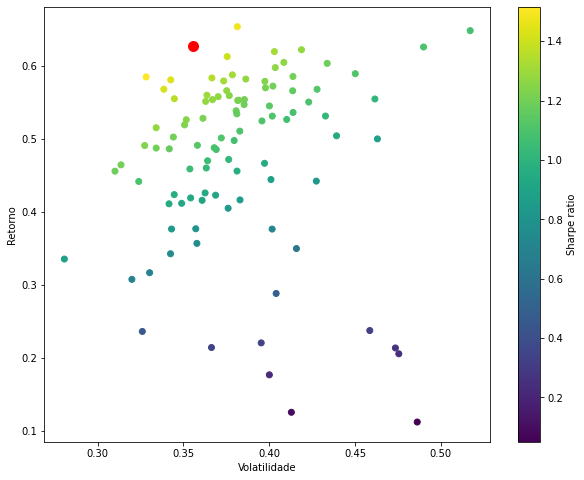

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

## Otimização de portfólio com algoritmos de otimização

- Biblioteca mlrose: https://mlrose.readthedocs.io/en/stable/

In [50]:
!pip install mlrose
#o mlrose é utilizado quando precisamos maximizar, ou minimizar um valor

In [51]:
!pip install scikit-learn==0.22

     |████████████████████████████████| 7.0 MB 17.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22 which is incompatible.


In [52]:
import mlrose

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [53]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ])

In [54]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [55]:
#é uma função de CUSTO que nos dará o valor de sharpe ratio
def fitness_function(solucao): #passe apenas este unico parametro
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum() #normalizando os pesos para que o total seja 1

  #normalizando
  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

#multiplica cada uma das acoes pelos pesos e pelo dinheiro total
  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels = ['Date'], axis = 1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

#sharpe ratio medio anual
  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

In [56]:
np.random.seed(10) #random seed  = 10
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [57]:
fitness_function(pesos)

1.0445677178791346

In [58]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100) #o 100 é só para ter em porcentagem

In [59]:
visualiza_alocacao(pesos)

GOL 26.617195545614496
CVC 0.7161207195395352
WEGE 21.866313475981215
MGLU 25.84017365648649
TOTS 17.202779081759033
BOVA 7.757417520619242


In [60]:
fitness = mlrose.CustomFitness(fitness_function)#passamos a função que acabamos de definir, criamos ela em um objeto
#a propria biblioteca chamará a função que criamos

In [61]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)
#trabalharemos com numeros float continuos (a discrt é para numero inteiros é usdo para otimização do tipo sim ou não)
#length quantos ativos, nese caso são 6 ações, fitness_fn será igual a função que acabamos de definir
#maximize = true indica que é um problema de maximização, min e max são numeros randomicos entre 0 e 1

In [62]:
#para termos a pior carteira, minimização
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = False, min_val = 0, max_val = 1)

### Hill climb

Começa com uma   soluçao randômica e  procura pelos melhores vizinhos.

Vai para o ponto com a maior cursatura, por isso precisamos definir uma  porcentagemligeiramente maior   ou ligeiramente menor.

Existemmáximos globais e máximos locais

In [63]:
#os melhores pesos = melhor solução
#melhor custo = melhor sharpe ratio
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state = 1)
#randon_state = 1 é  para sempre termos os mesmos  resultados
melhor_solucao, melhor_custo
#gera valores entre0 e  1para cada uma das posições, mas queremos que a soma dos pesos seja = 1

(array([0.        , 0.22032449, 0.10011437, 0.90233257, 0.        ,
        0.        ]), 1.2706811570370895)

In [64]:
#recriando avariável anterior
#normalizando para que a soma seja 1
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.18018453, 0.08187497, 0.7379405 , 0.        ,
        0.        ]), 0.9999999999999999)

In [65]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 18.018452678413226
WEGE 8.187496981804403
MGLU 73.79405033978236
TOTS 0.0
BOVA 0.0


In [66]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor
#lucro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



404578.300886321

In [67]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state = 1)
pior_solucao, pior_custo

(array([0.        , 0.32032449, 0.        , 0.        , 0.64675589,
        0.49233859]), -0.39669479241587463)

In [68]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.        , 0.21948769, 0.        , 0.        , 0.44315985,
        0.33735247]), 0.9999999999999999)

In [69]:
visualiza_alocacao(pior_solucao)

GOL 0.0
CVC 21.94876851988625
WEGE 0.0
MGLU 0.0
TOTS 44.31598465629341
BOVA 33.73524682382033


In [70]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)
soma_valor
#lucro ao final desses 5 anos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



5926.919066862072

### Simulated annealing (Têmpera simulada)

INspirado na física: processi de aquecer um metal e deixa-lo esfriar lentamente. Os átomos tendem a se mexer bastante no inicio e gradualmenteentram embaixos estados de energia.

Assim, começamos com uma solção randomica utilizando uma variável que representa a temperatura que começa alta e abaixa no decorrer do algoritmo.

No algoritmo Hill climb se a solução atual é PIOR  do que a anterior, nós descartamos a atual e mantemos apenas a anterior. No Simulated Anneling, mesmo tendo um resultado inferior, a solução atual seria mantida

In [71]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)
#random  state = 1 para manter sempre os menos valores
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo # melhor custo é  o sharpe ratio

(array([0.        , 0.09090909, 0.18181818, 0.72727273, 0.        ,
        0.        ]), 1.2706649817449556)

In [72]:
visualiza_alocacao(melhor_solucao)
#enxergando melhor

GOL 0.0
CVC 9.090909090909092
WEGE 18.181818181818183
MGLU 72.72727272727273
TOTS 0.0
BOVA 0.0


In [73]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor
#inferior ao hill climb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



401733.4517539583

### Algoritmo genético

Escolhemos quantas soluções (individuos) serão geradas e os porcentuais para cdauma das ações(genes)

Avaliação da população

Critério de parada, pq precisamos que um numero finito de repetições (gerações)

seselecionamos os pais, aqueles que tem os melhores sharpe ratios.  Os pais geraram a 2ª geração

crossover (operador genético), combinação dos 2 melhores individuos

Mutação (operador genético), pquenas  alteraçõesnos individuos

Avaliar população, definir populaçãosobrevivente

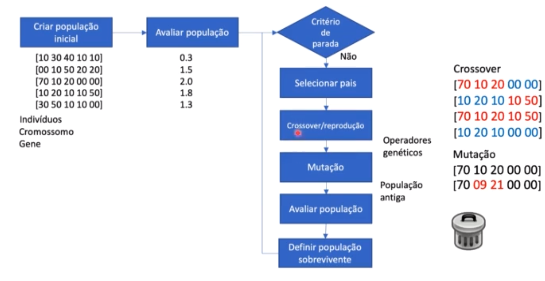


In [74]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length = 6, fitness_fn = fitness, 
                                               maximize = True, min_val = 0.1, max_val = 1)

#se min_val=0 dá erro, masnão era p dá
#erre problema faz com que ele não zere nenhum  dos pesos

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

In [ ]:
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor #lucro ao final  dos 5 anos
#inferior aos demais

## Exercício

In [33]:
dataset_original = pd.read_csv('acoes_ex.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100
dataset_original

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,13.720000,14.00,43.480000,19.860001,32.779999,95.800003
1442,2020-10-28,13.370000,12.97,42.610001,18.639999,31.139999,92.430000
1443,2020-10-29,12.890000,12.84,42.250000,19.330000,30.959999,92.910004
1444,2020-10-30,12.180000,12.61,42.669998,19.000000,29.799999,90.660004


In [34]:
sharpe_ratio, melhores_pesos, _, _, _, _, _ = alocacao_portfolio(dataset_original, 5000, 
                                                                 taxa_selic_historico.mean() / 100, 
                                                                 1000)

NameError: ignored

In [ ]:
sharpe_ratio

0.05505740067009889

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhores_pesos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
acoes_pesos, soma_valor

(        Ações      Pesos
 0       AMBEV   0.260490
 1  ODONTOPREV  15.712115
 2        VIVO   4.974127
 3   PETROBRAS  34.874414
 4     BBRASIL   4.999848
 5        BOVA  39.179006, 9312.446933470928)

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.11285100663655277
AMBEV 0.0
ODONTOPREV 0.0
VIVO 0.0
PETROBRAS 100.0
BBRASIL 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



10938.889185587566

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.06892814399053529
AMBEV 0.0
ODONTOPREV 0.0
VIVO 0.0
PETROBRAS 83.33333333333333
BBRASIL 0.0
BOVA 16.66666666666668


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



10742.733510208745

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

-0.11990688158739476
AMBEV 5.459253062007656
ODONTOPREV 5.723100686674163
VIVO 11.16523150400342
PETROBRAS 45.20355156345249
BBRASIL 7.548995174711988
BOVA 24.899868009150286


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



9106.821255365569